In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt

In [2]:
import requests_cache

session = requests_cache.CachedSession(cache_name='cache', backend='sqlite')

# just add headers to your session and provide it to the reader
session.headers = {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:89.0) Gecko/20100101 Firefox/89.0',     'Accept': 'application/json;charset=utf-8'}


df=web.DataReader('TSLA', data_source='yahoo', start='2010-01-01', end='2022-8-12', session=session)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,5.000000,3.508000,3.800000,4.778000,93831500.0,4.778000
2010-06-30,6.084000,4.660000,5.158000,4.766000,85935500.0,4.766000
2010-07-01,5.184000,4.054000,5.000000,4.392000,41094000.0,4.392000
2010-07-02,4.620000,3.742000,4.600000,3.840000,25699000.0,3.840000
2010-07-06,4.000000,3.166000,4.000000,3.222000,34334500.0,3.222000
...,...,...,...,...,...,...
2022-08-05,913.820007,856.630005,908.010010,864.510010,37655300.0,864.510010
2022-08-08,915.599976,867.260010,885.000000,871.270020,32998000.0,871.270020
2022-08-09,877.190002,838.059998,870.880005,850.000000,28748200.0,850.000000


In [3]:
df['Date']=df.index
df=df.reset_index(drop=True)
df=df[['Date', 'Close']]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3052 entries, 0 to 3051
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3052 non-null   datetime64[ns]
 1   Close   3052 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 47.8 KB


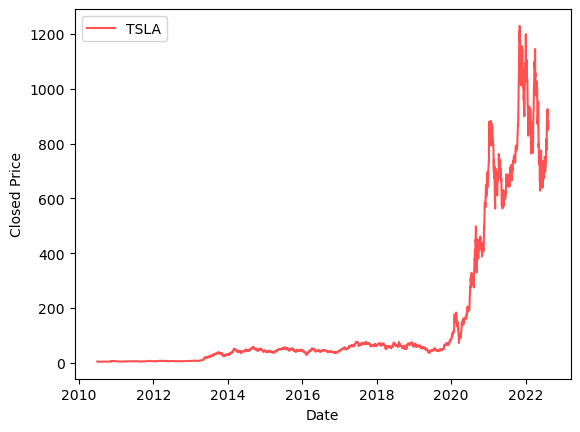

In [5]:
plt.plot(df['Date'], df['Close'], color='#FF5151', label='TSLA')
plt.xlabel('Date')
plt.ylabel('Closed Price')
plt.legend(loc='upper left')
plt.show()

In [6]:
data=df[['Close']]
dataset=np.array(data)
type(dataset)
training_data_len=int(len(data)*0.8)
training_data_len

2441

In [7]:
#Scale the data
scaler=StandardScaler()
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[-0.56614249],
       [-0.56618616],
       [-0.56754721],
       ...,
       [ 2.50976549],
       [ 2.63011293],
       [ 2.54575695]])

In [8]:
scaled_data.shape

(3052, 1)

In [9]:
#Create training dataset
train_data=scaled_data[:training_data_len,:]
X_train=[]
y_train=[]

for i in range(60, training_data_len):
    X_train.append(train_data[i-60:i])
    y_train.append(train_data[i])
X_train=np.array(X_train)
y_train=np.array(y_train)
print(f"X_train.shape is {X_train.shape}")
print(f"y_train.shape is {y_train.shape}")

X_train.shape is (2381, 60, 1)
y_train.shape is (2381, 1)


In [22]:
model=Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.1))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.1))
model.add(Dense(units=1))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_3 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_4 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_4 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                

In [24]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [25]:
model.fit(X_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
75/75 [==============================] - 6s 36ms/step - loss: 0.0104
Epoch 2/10
75/75 [==============================] - 3s 36ms/step - loss: 0.0014
Epoch 3/10
75/75 [==============================] - 3s 36ms/step - loss: 0.0012
Epoch 4/10
75/75 [==============================] - 3s 36ms/step - loss: 0.0011
Epoch 5/10
75/75 [==============================] - 3s 37ms/step - loss: 0.0010
Epoch 6/10
75/75 [==============================] - 3s 37ms/step - loss: 9.7371e-04
Epoch 7/10
75/75 [==============================] - 3s 36ms/step - loss: 9.2092e-04
Epoch 8/10
75/75 [==============================] - 3s 36ms/step - loss: 9.8290e-04
Epoch 9/10
75/75 [==============================] - 3s 36ms/step - loss: 8.7965e-04
Epoch 10/10
75/75 [==============================] - 3s 37ms/step - loss: 8.5119e-04


In [14]:
X_test=[]
y_test=dataset[training_data_len:]
for i in range(training_data_len, len(dataset)):
    X_test.append(scaled_data[i-60:i])
X_test=np.array(X_test)
print(X_test.shape)

(611, 60, 1)


In [26]:
predictions=model.predict(X_test)
predictions=scaler.inverse_transform(predictions)
type(predictions)

numpy.ndarray

In [29]:
train=df[['Date', 'Close']][:training_data_len]
valid=df[['Date', 'Close']][training_data_len:]
valid['Predictions']=predictions
valid

,Date,Close,Predictions
2441,2020-03-11,126.846001,154.496887
2442,2020-03-12,112.110001,151.786163
2443,2020-03-13,109.323997,148.774673
2444,2020-03-16,89.014000,145.442490
2445,2020-03-17,86.040001,141.591736
...,...,...,...
3047,2022-08-05,864.510010,574.428223
3048,2022-08-08,871.270020,578.295654
3049,2022-08-09,850.000000,581.823914
3050,2022-08-10,883.070007,584.844971


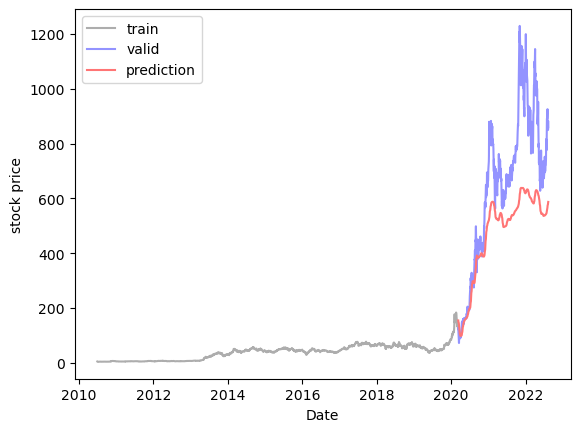

In [30]:
plt.plot(train['Date'], train['Close'], label='train', color='#ADADAD')
plt.plot(valid['Date'], valid['Close'], label='valid', color='#9393FF')
plt.plot(valid['Date'], valid['Predictions'], label='prediction', color='#FF7575')
plt.legend(loc='upper left')
plt.xlabel('Date')
plt.ylabel('stock price')
plt.show()